# $Z_{20}$ vs ssh

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import xarray as xr
import tqdm
import pathlib
import cmocean
import os
import copy
import time

# Import custom modules
import src.utils

## set plotting specs
sns.set(rc={"axes.facecolor": "white", "axes.grid": False})

## bump up DPI
mpl.rcParams["figure.dpi"] = 100

## get filepaths
DATA_FP = pathlib.Path(os.environ["DATA_FP"])
SAVE_FP = pathlib.Path(os.environ["SAVE_FP"])

## funcs

## Load data

In [2]:
## load spatial data
forced, anom = src.utils.load_consolidated()

## subset
anom = anom[["ssh", "ssh_comp", "z20", "z20_comp", "nhf", "nhf_comp"]]

## Compute indices

In [4]:
## compute indices
idxs = src.utils.reconstruct_wrapper(
    anom,
    fn=src.utils.get_RO_hw,
)

## subset by time
idxs = src.utils.get_windowed(idxs)
idxs = src.utils.get_ddt(idxs)

## Plot $Z_{20}$ vs. ssh

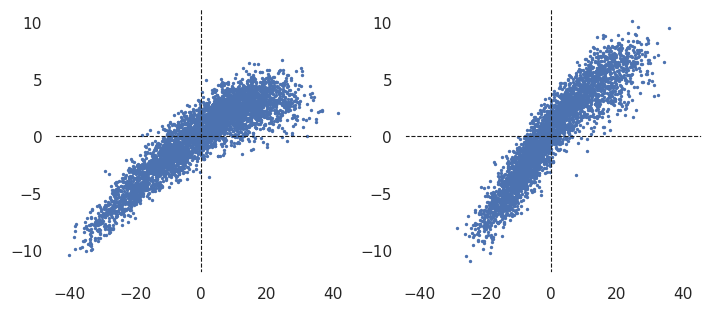

In [32]:
sel = lambda x: src.utils.sel_month(x, months=4)

fig, axs = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")

for ax, i in zip(axs, [0, -1]):
    ax.scatter(
        sel(idxs["z20"]).isel(year=i),
        sel(idxs["ssh"]).isel(year=i),
        s=2,
    )

    axis_kwargs = dict(ls="--", c="k", lw=0.8)
    ax.axhline(0, **axis_kwargs)
    ax.axvline(0, **axis_kwargs)

## format
src.utils.set_lims(axs)

plt.show()

## tendency correlation with NHF

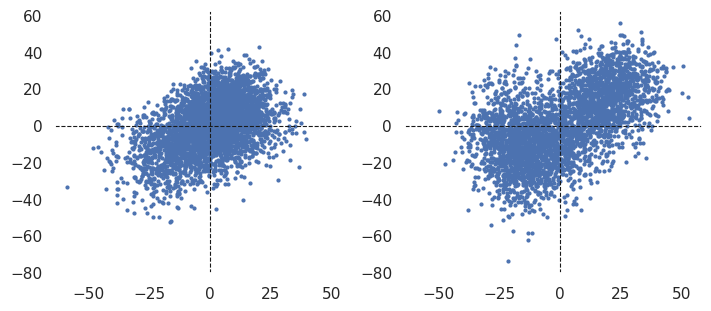

In [37]:
sel = lambda x: src.utils.sel_month(x, months=1)

fig, axs = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")

for ax, i in zip(axs, [0, -1]):
    ax.scatter(
        sel(idxs["nhf"]).isel(year=i),
        sel(idxs["ddt_ssh"]).isel(year=i),
        s=4,
    )

    axis_kwargs = dict(ls="--", c="k", lw=0.8)
    ax.axhline(0, **axis_kwargs)
    ax.axvline(0, **axis_kwargs)

## format
src.utils.set_lims(axs)

plt.show()